In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ДЗ №7 Гладышев В.В.

## Задание № 1

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [55]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
        
        #print(classes)
        
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [56]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [57]:
k = 15

for k_i in range(1, k+1):
    y_pred = knn(X_train, y_train, X_test, k_i)
    print(f'Точность алгоритма при k = {k_i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.833
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 8: 0.800
Точность алгоритма при k = 9: 0.867
Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 11: 0.833
Точность алгоритма при k = 12: 0.800
Точность алгоритма при k = 13: 0.833
Точность алгоритма при k = 14: 0.833
Точность алгоритма при k = 15: 0.833


In [51]:
def knn_wi(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d, w in zip(sorted(test_distances)[0:k], range(1, k+1)):
            classes[d[1]] += 1/w
        
        #print(classes)

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [52]:
k = 15

for k_i in range(1, k+1):
    y_pred = knn_wi(X_train, y_train, X_test, k_i)
    print(f'Точность алгоритма при k = {k_i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.667
Точность алгоритма при k = 4: 0.733
Точность алгоритма при k = 5: 0.733
Точность алгоритма при k = 6: 0.733
Точность алгоритма при k = 7: 0.733
Точность алгоритма при k = 8: 0.767
Точность алгоритма при k = 9: 0.767
Точность алгоритма при k = 10: 0.767
Точность алгоритма при k = 11: 0.767
Точность алгоритма при k = 12: 0.767
Точность алгоритма при k = 13: 0.767
Точность алгоритма при k = 14: 0.767
Точность алгоритма при k = 15: 0.767


In [53]:
def get_graph_wi(X_train, y_train, k):
    cmap = ListedColormap(['red', 'green', 'blue'])
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_wi(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

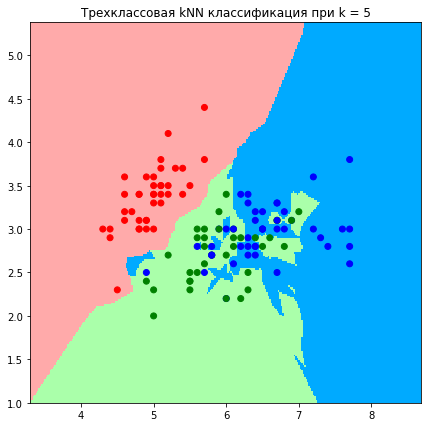

In [54]:
get_graph_wi(X_train, y_train, 5)

In [60]:
def knn_wd(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1/(d[0]+0.001)
        
        #print(classes)

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [61]:
k = 15

for k_i in range(1, k+1):
    y_pred = knn_wd(X_train, y_train, X_test, k_i)
    print(f'Точность алгоритма при k = {k_i}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.733
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.800
Точность алгоритма при k = 5: 0.833
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.767
Точность алгоритма при k = 8: 0.800
Точность алгоритма при k = 9: 0.833
Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 11: 0.833
Точность алгоритма при k = 12: 0.833
Точность алгоритма при k = 13: 0.833
Точность алгоритма при k = 14: 0.833
Точность алгоритма при k = 15: 0.833


In [62]:
def get_graph_wd(X_train, y_train, k):
    cmap = ListedColormap(['red', 'green', 'blue'])
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn_wd(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

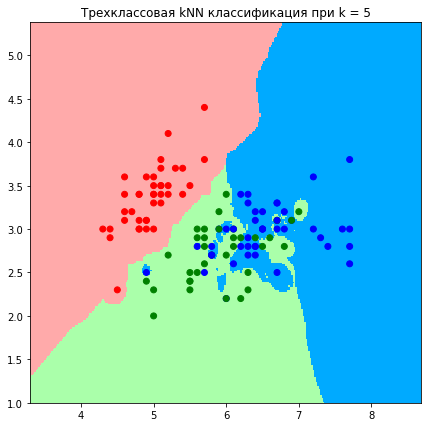

In [63]:
get_graph_wd(X_train, y_train, 5)

## Задание № 2

Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить 
график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [ ]:
#Скоро добавлю (under construction)